In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [293]:
df = pd.read_csv('SmallDS.csv')

In [294]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      1079 non-null   object
 1   Prices       1079 non-null   object
 2   Area         1079 non-null   object
 3   toFace       1079 non-null   object
 4   type         1079 non-null   object
 5   certificate  1079 non-null   object
 6   width        1079 non-null   object
 7   length       1079 non-null   object
 8   floors       1079 non-null   object
dtypes: object(9)
memory usage: 76.0+ KB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [296]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\632191419.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')


In [297]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [298]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\686885982.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')


Những giá trị area nào bằng 0 thì chuyển về NaN

In [299]:
df.loc[df.Area==0,'Area']=np.nan

In [300]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [301]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [302]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [303]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [304]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [305]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [306]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [307]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [308]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [309]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [310]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\2836111748.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
C:\Users\PC\AppData\Local\Temp\ipykernel_15796\2836111748.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')


Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [311]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [312]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [313]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9'],
      dtype=object)

Chuyển những giá trị '---' thành NaN

In [314]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\4023322969.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')


### Định dạng lại dữ liệu

In [315]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [316]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      1079 non-null   object  
 1   Prices       1073 non-null   float64 
 2   Area         1063 non-null   float64 
 3   toFace       1079 non-null   category
 4   type         1079 non-null   category
 5   certificate  1079 non-null   category
 6   width        896 non-null    float64 
 7   length       700 non-null    float64 
 8   floors       1045 non-null   Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 55.5+ KB


In [318]:
df.describe()

,Prices,Area,width,length,floors
count,1073.000000,1063.000000,896.000000,700.000000,1045.0
mean,7.642089,86.908749,5.860547,17.685071,2.661244
std,7.888215,62.190160,3.240779,11.447695,1.514957
min,1.350000,1.000000,3.000000,3.000000,1.0
25%,3.750000,60.000000,4.500000,13.500000,2.0
50%,5.300000,80.000000,5.000000,17.000000,3.0
75%,7.800000,100.000000,6.000000,20.000000,3.0
max,80.000000,745.000000,52.000000,200.000000,33.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [319]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [320]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [321]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [322]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [323]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [324]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [325]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Outlier

In [326]:
data = df.copy()
# data_cp : chưa xử lý ngoại lệ
data_cp = df.copy()

In [327]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 32.9089611867788


In [328]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

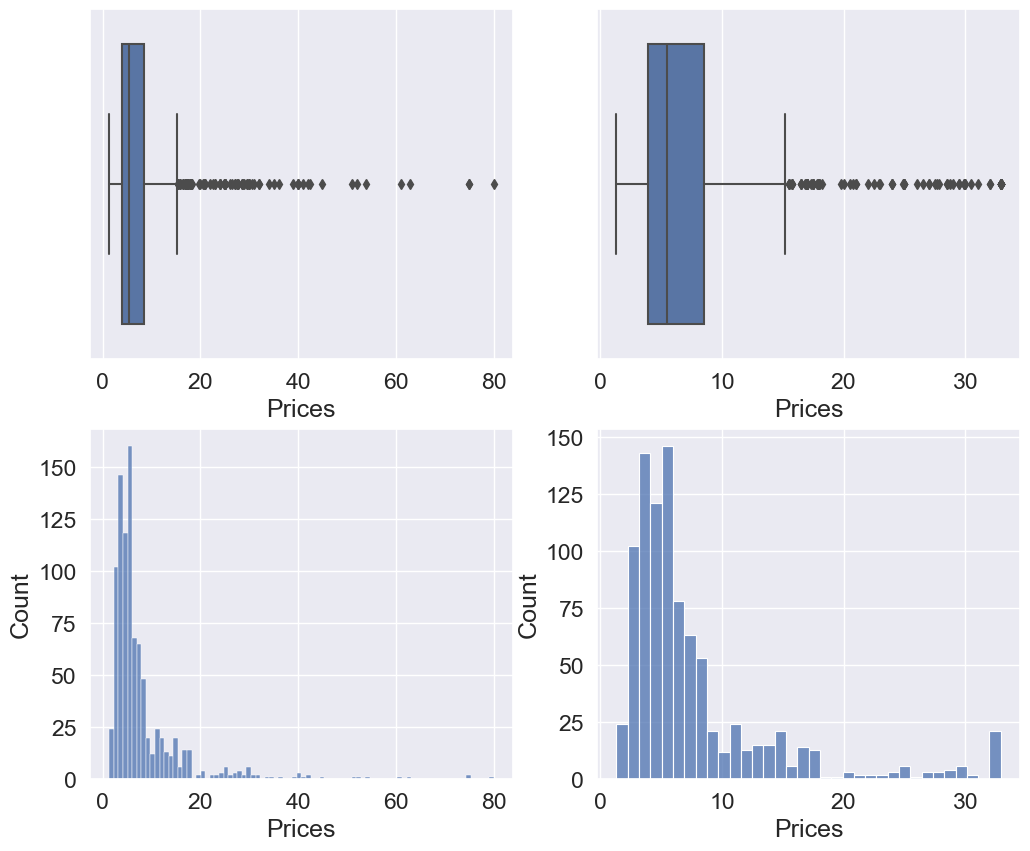

In [329]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data_cp,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data_cp,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [330]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 279.82412825905453


In [331]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

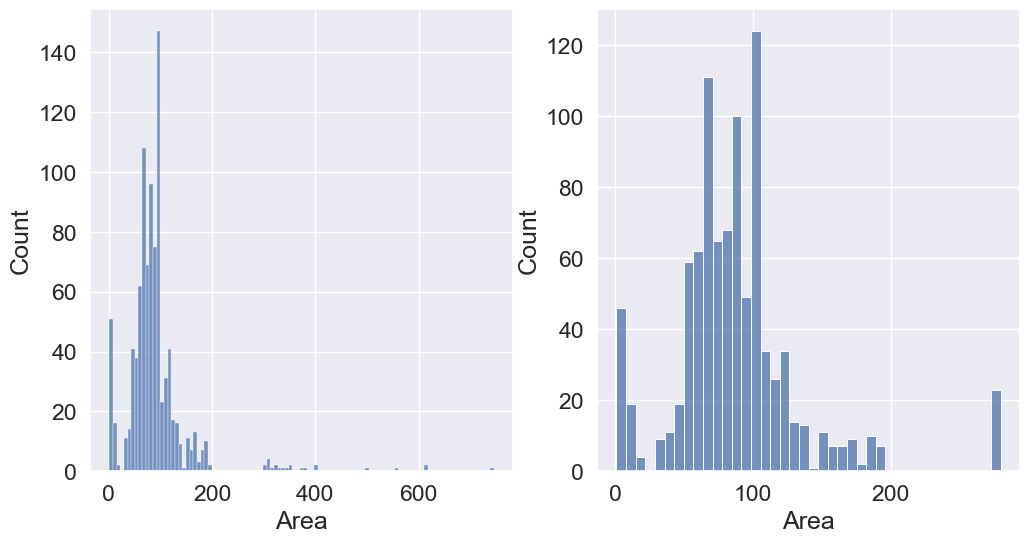

In [332]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [333]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 6.084306217319162


In [334]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

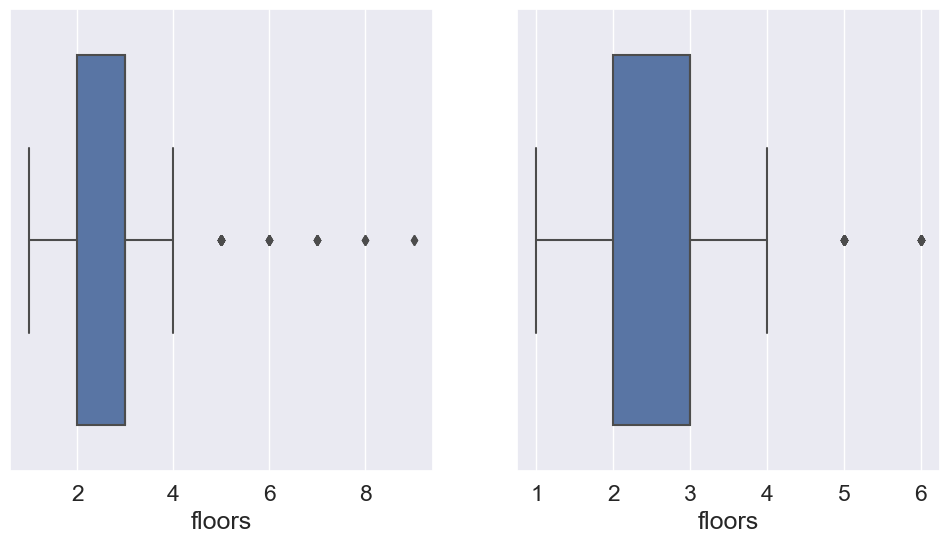

In [335]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [336]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 16.689259880530095


<Axes: xlabel='width'>

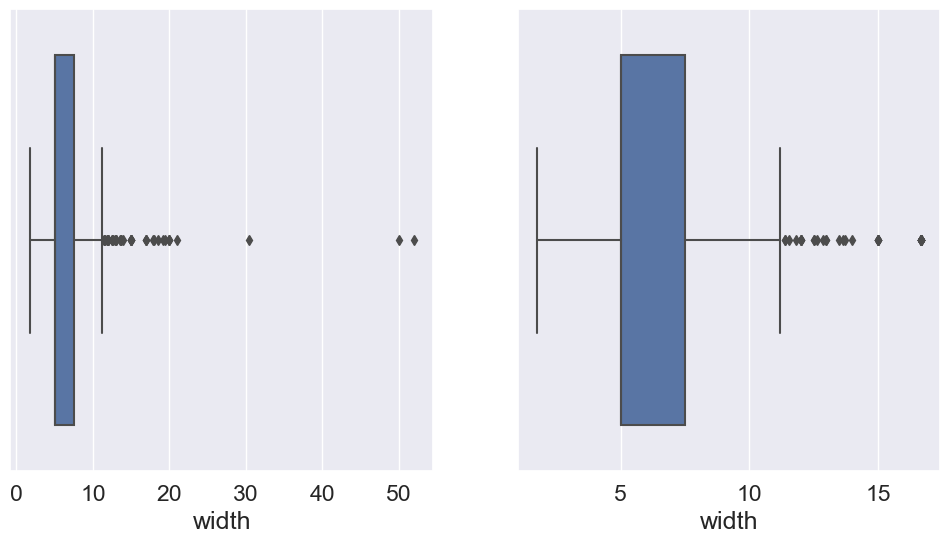

In [337]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [338]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 48.68112128934263


<Axes: xlabel='length'>

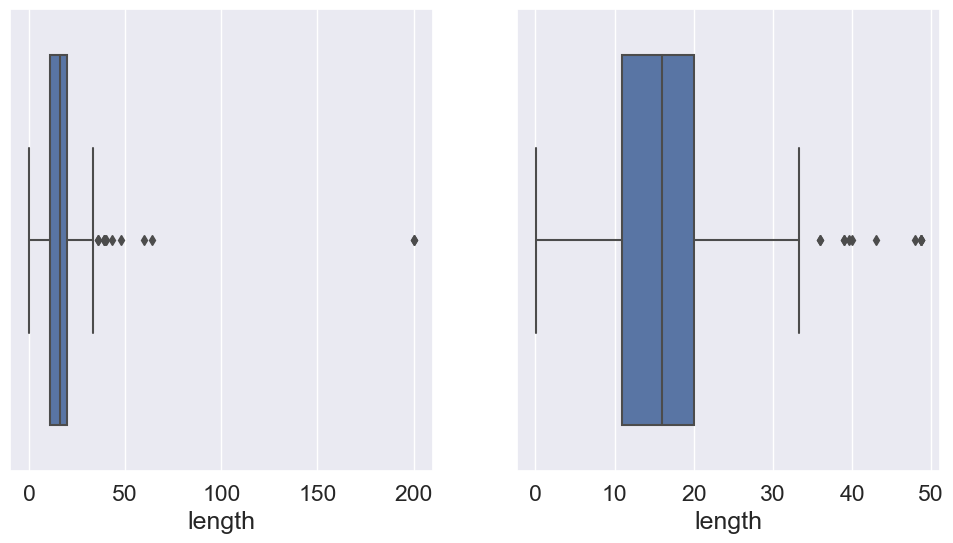

In [339]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])

## Feature Transformation

In [340]:
data = df.copy()

In [341]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(df[feature])
    
    plt.show()

Chuẩn hóa các trường Area, width, length với chuẩn hóa Normalizer

In [342]:
from sklearn.preprocessing import Normalizer
df_scaler = pd.DataFrame(Normalizer().fit_transform(data[['Area','width','length']]),columns=['Area_scaler','width_scaler','length_scaler']) 
df['Area']=df_scaler['Area_scaler']
df['width']=df_scaler['width_scaler']
df['length']=df_scaler['length_scaler']

In [343]:
df_scaler

,Area_scaler,width_scaler,length_scaler
0,0.979404,0.048970,0.195881
1,0.988439,0.107211,0.107211
2,0.965623,0.054767,0.254111
3,0.989370,0.052718,0.135530
4,0.979129,0.054396,0.195826
...,...,...,...
939,0.997297,0.017820,0.071280
940,0.975876,0.062735,0.209116
941,0.972182,0.067305,0.224350
942,0.982715,0.054595,0.176889


Chuẩn hóa trường Prices với phương pháp chuẩn hóa PowerTransformer

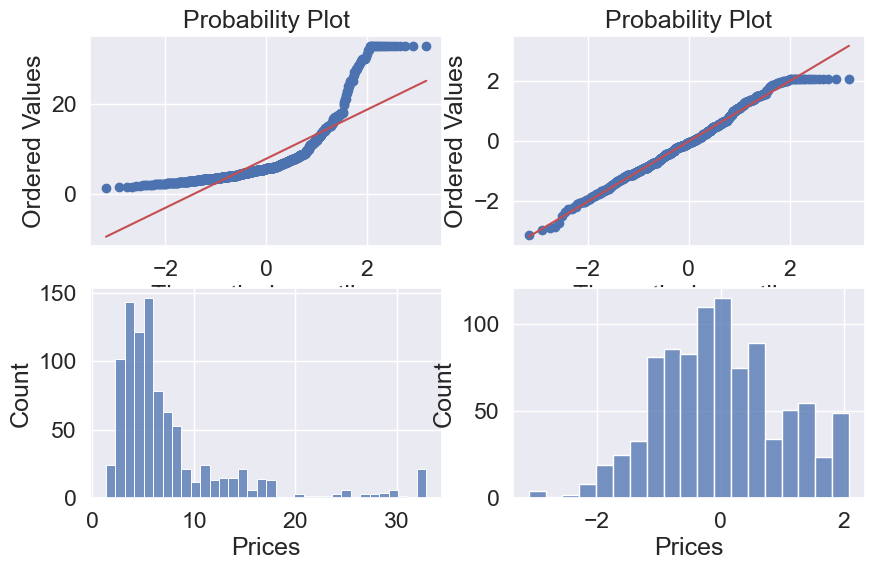

In [344]:
from sklearn.preprocessing import PowerTransformer

df['Prices'] = PowerTransformer().fit_transform(df[['Prices']])

plot_data('Prices')

<Axes: xlabel='Area', ylabel='Prices'>

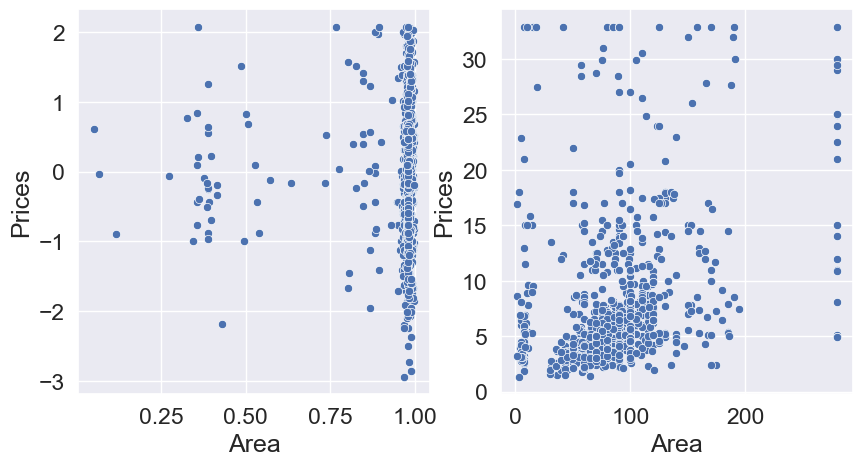

In [345]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='Area',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='Area',y='Prices',ax=axes[1])

<Axes: xlabel='width', ylabel='Prices'>

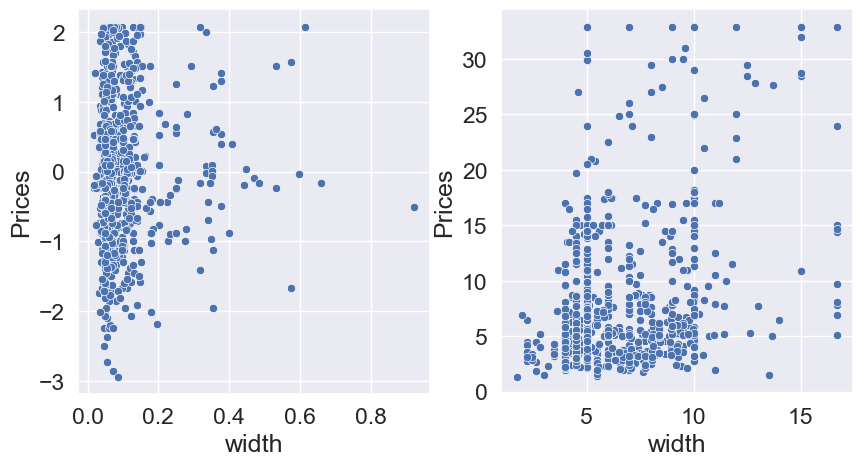

In [346]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='width',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='width',y='Prices',ax=axes[1])

<Axes: xlabel='length', ylabel='Prices'>

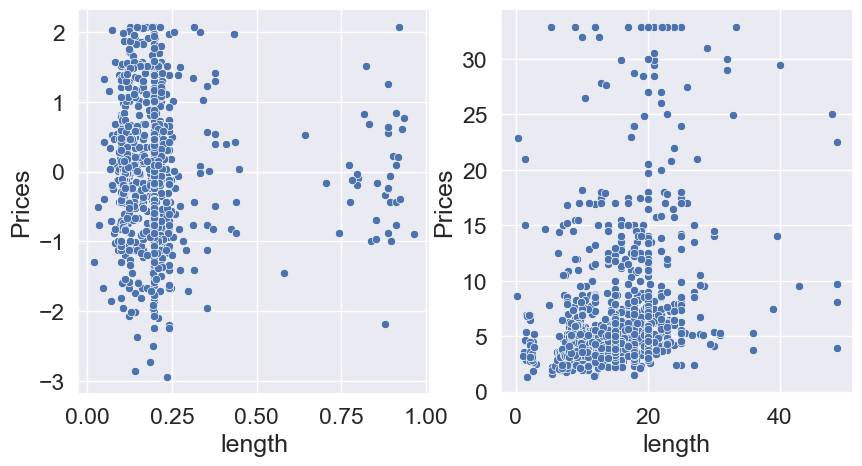

In [347]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='length',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='length',y='Prices',ax=axes[1])

In [348]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,-0.177078,0.979404,Tây Nam,Nhà mặt tiền,Không có,0.048970,0.195881,4
1,Thi Sách,Hòa Thuận Tây,hải châu,-0.613236,0.988439,Không,Nhà mặt tiền,Không có,0.107211,0.107211,1
2,Ông Ích Khiêm,Tam Thuận,thanh khê,1.009414,0.965623,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,0.054767,0.254111,3
3,Núi Thành,Hòa Cường Bắc,hải châu,1.543290,0.989370,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,0.052718,0.135530,3
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,0.352218,0.979129,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,0.054396,0.195826,4


## Feature Selection (QKhang)

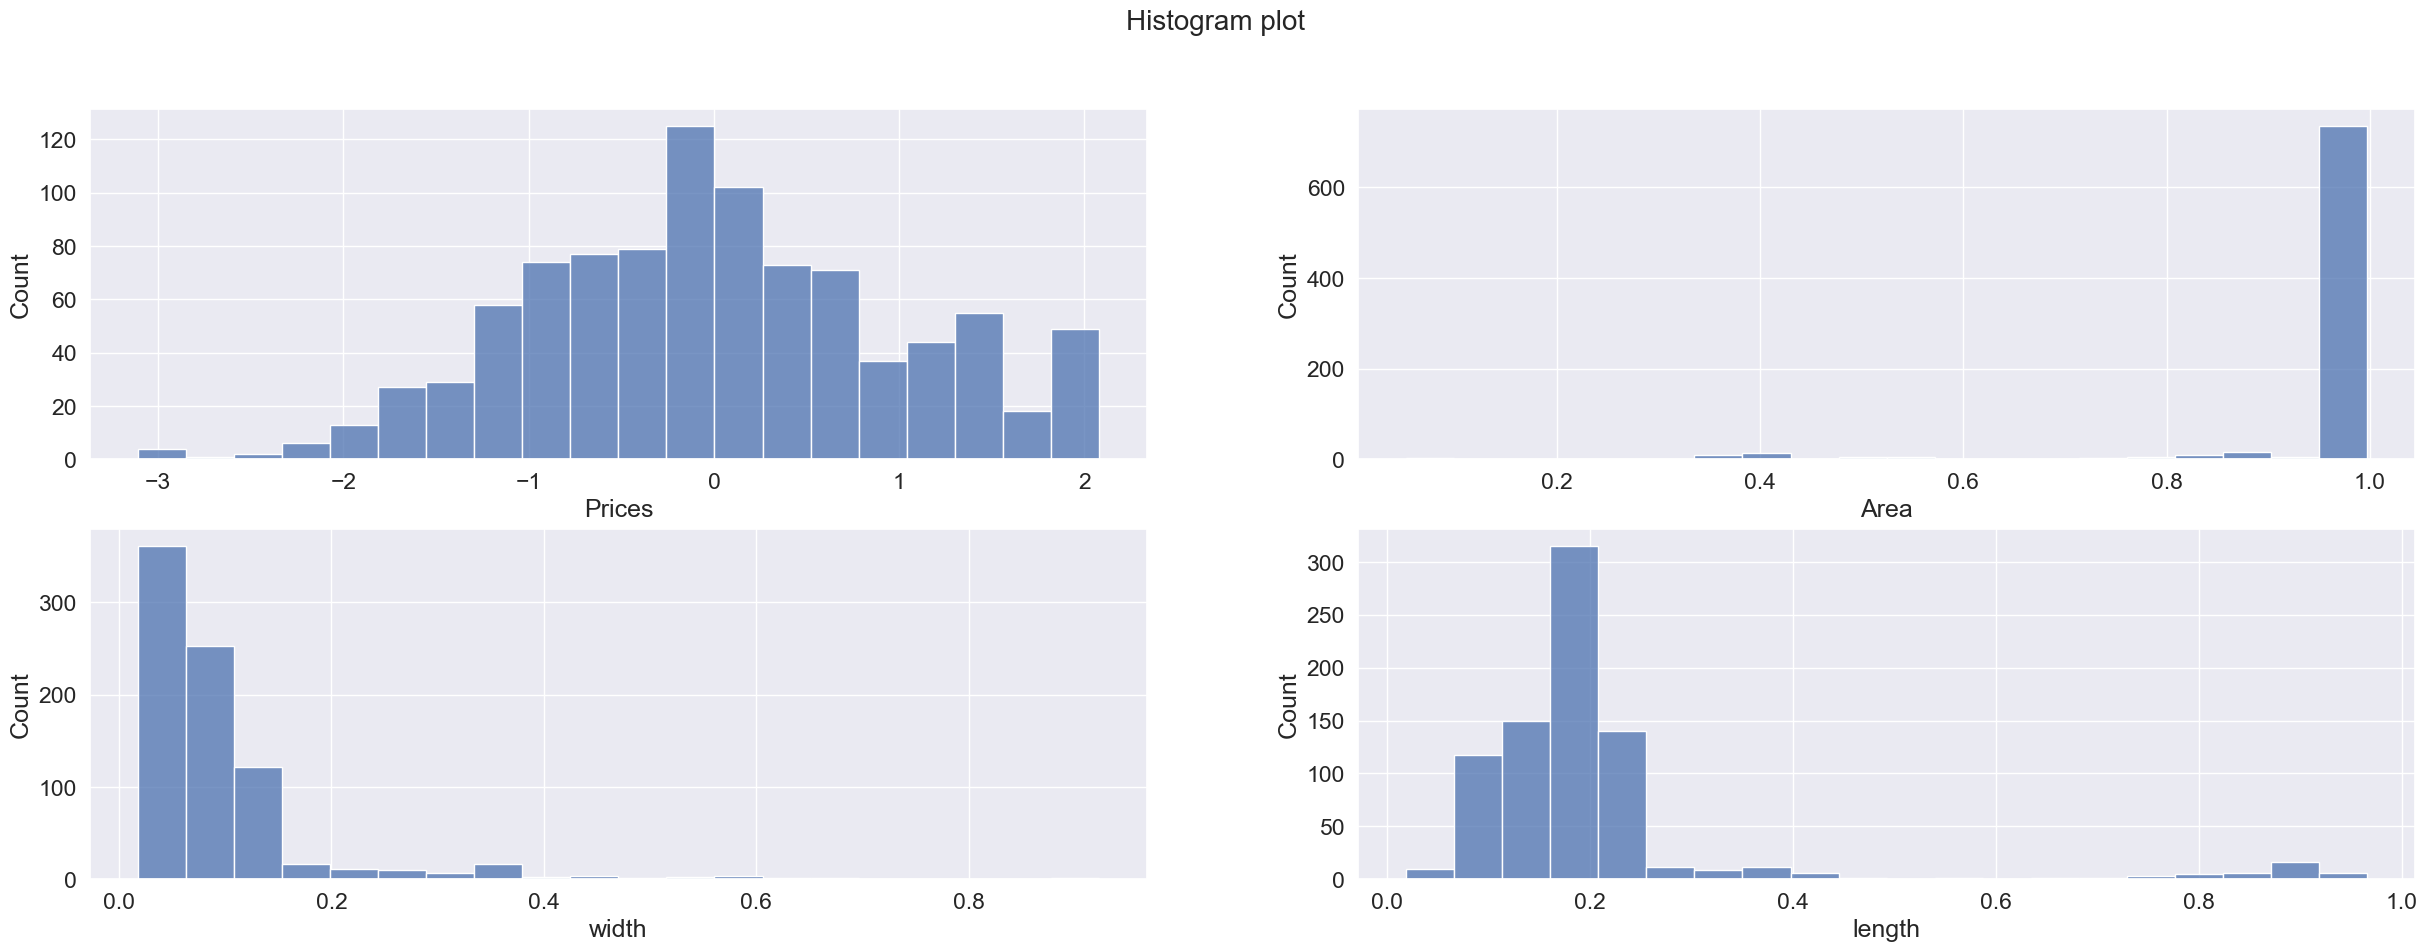

In [349]:
NummericData = ['Prices','Area','width','length']
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

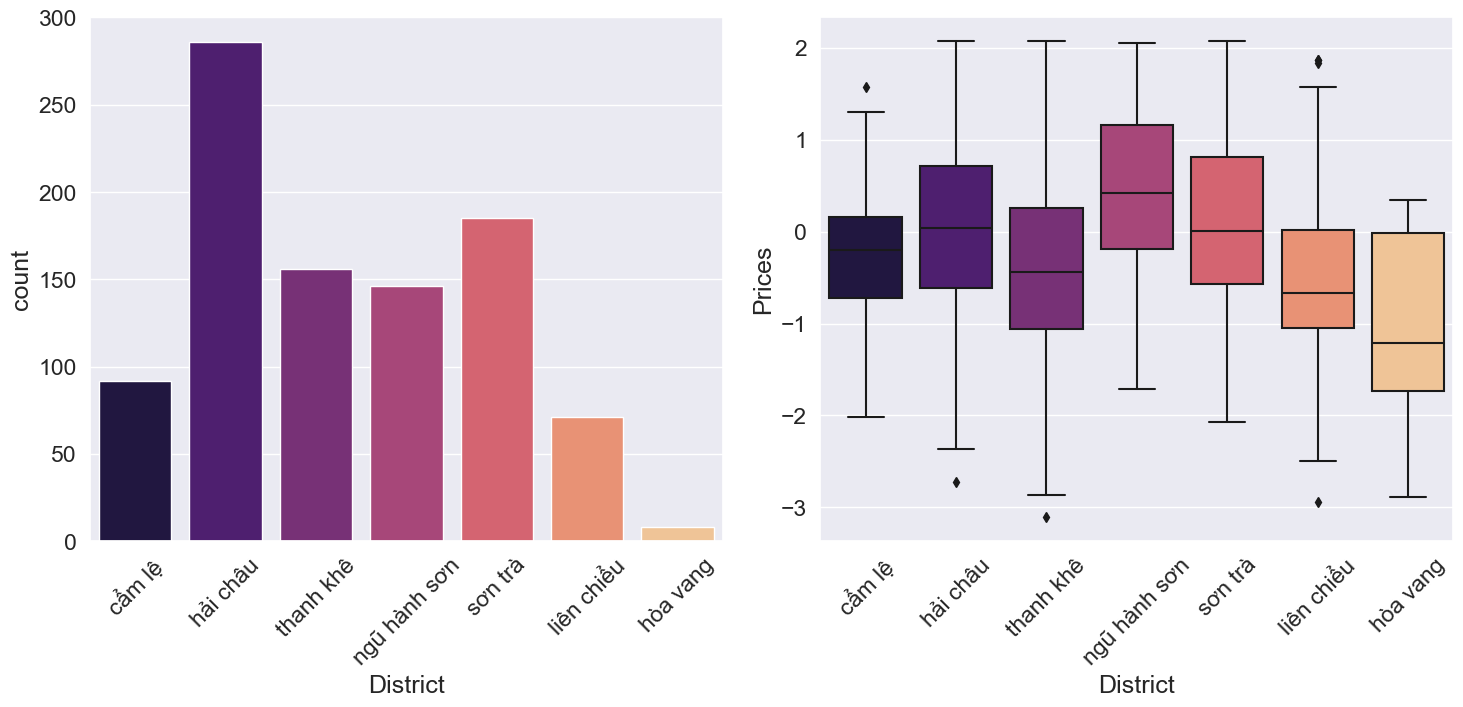

In [350]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

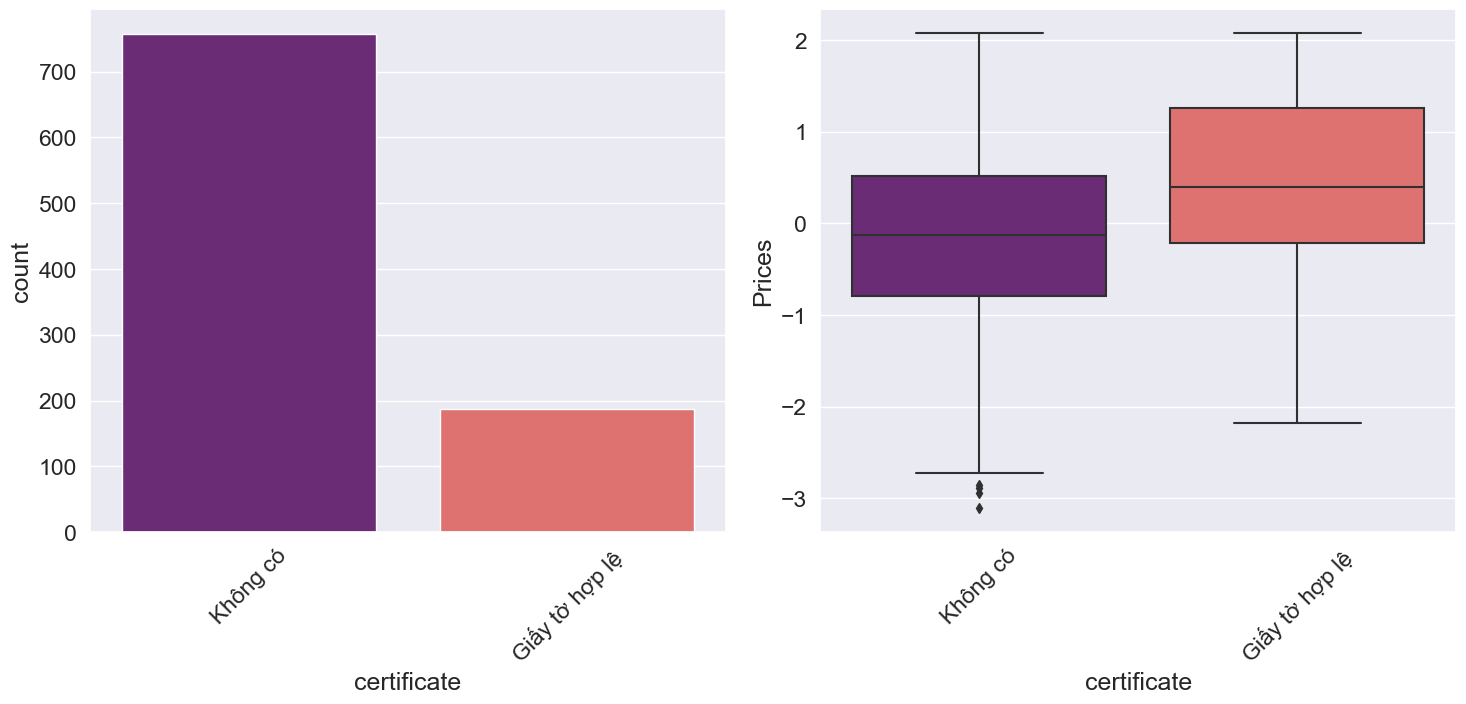

In [351]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

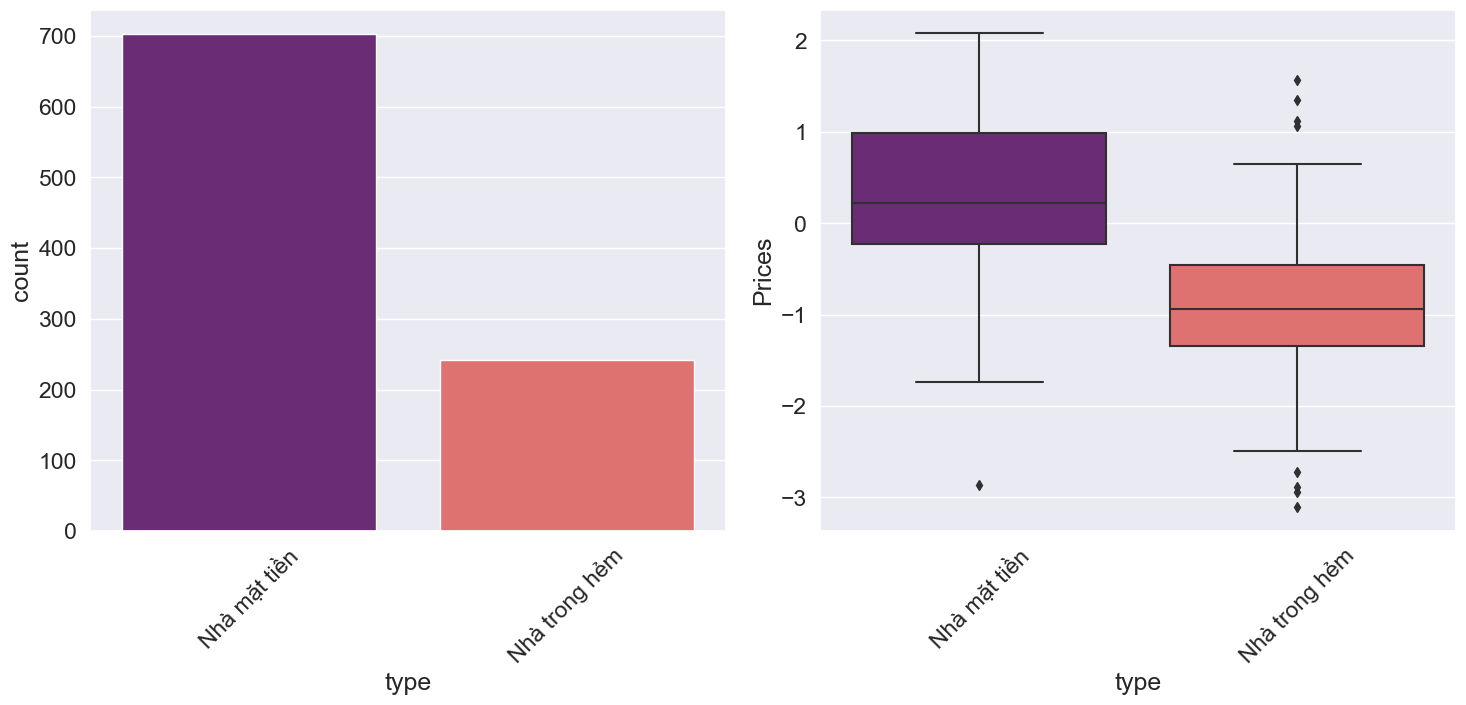

In [352]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

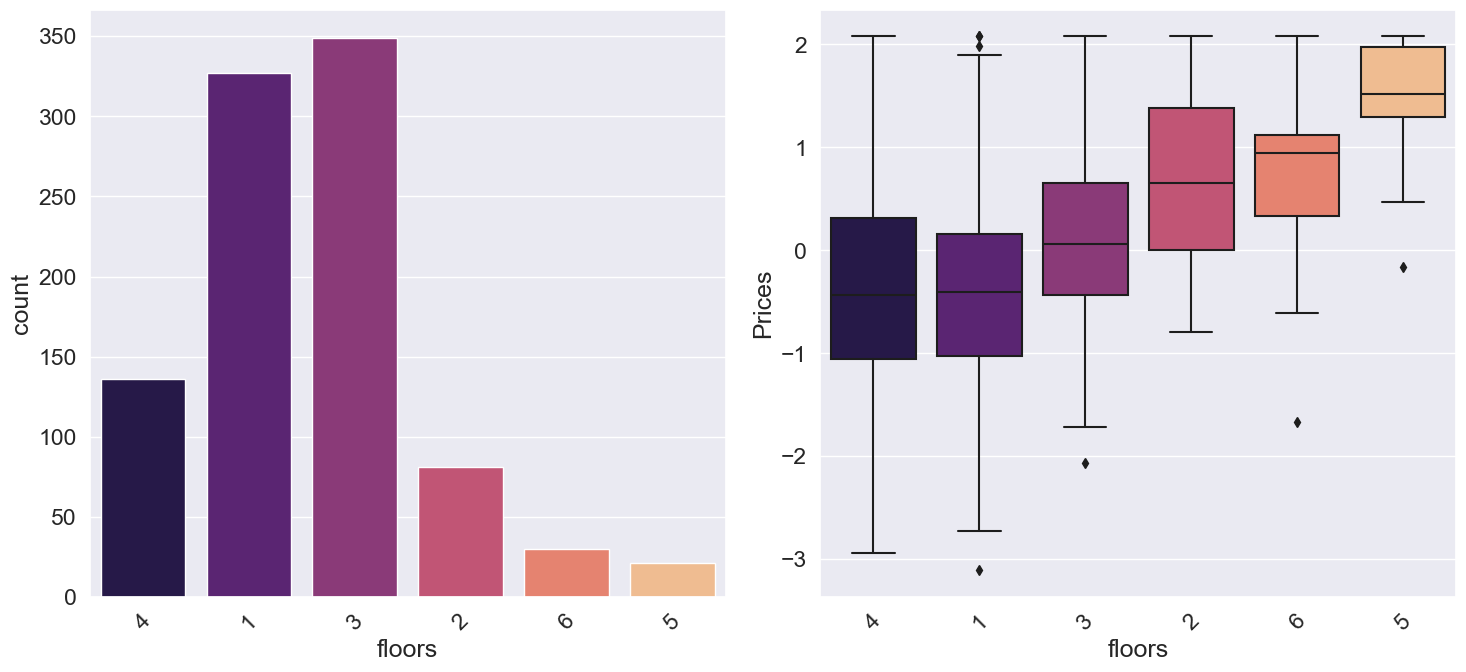

In [353]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

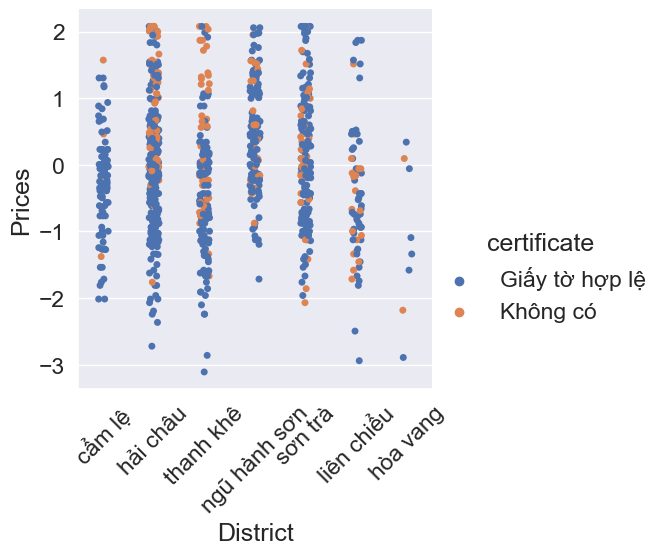

In [354]:
axis = sns.catplot(data= df,x='District',y='Prices',hue='certificate')
axis.set_xticklabels(df['District'].unique(), rotation = 45)

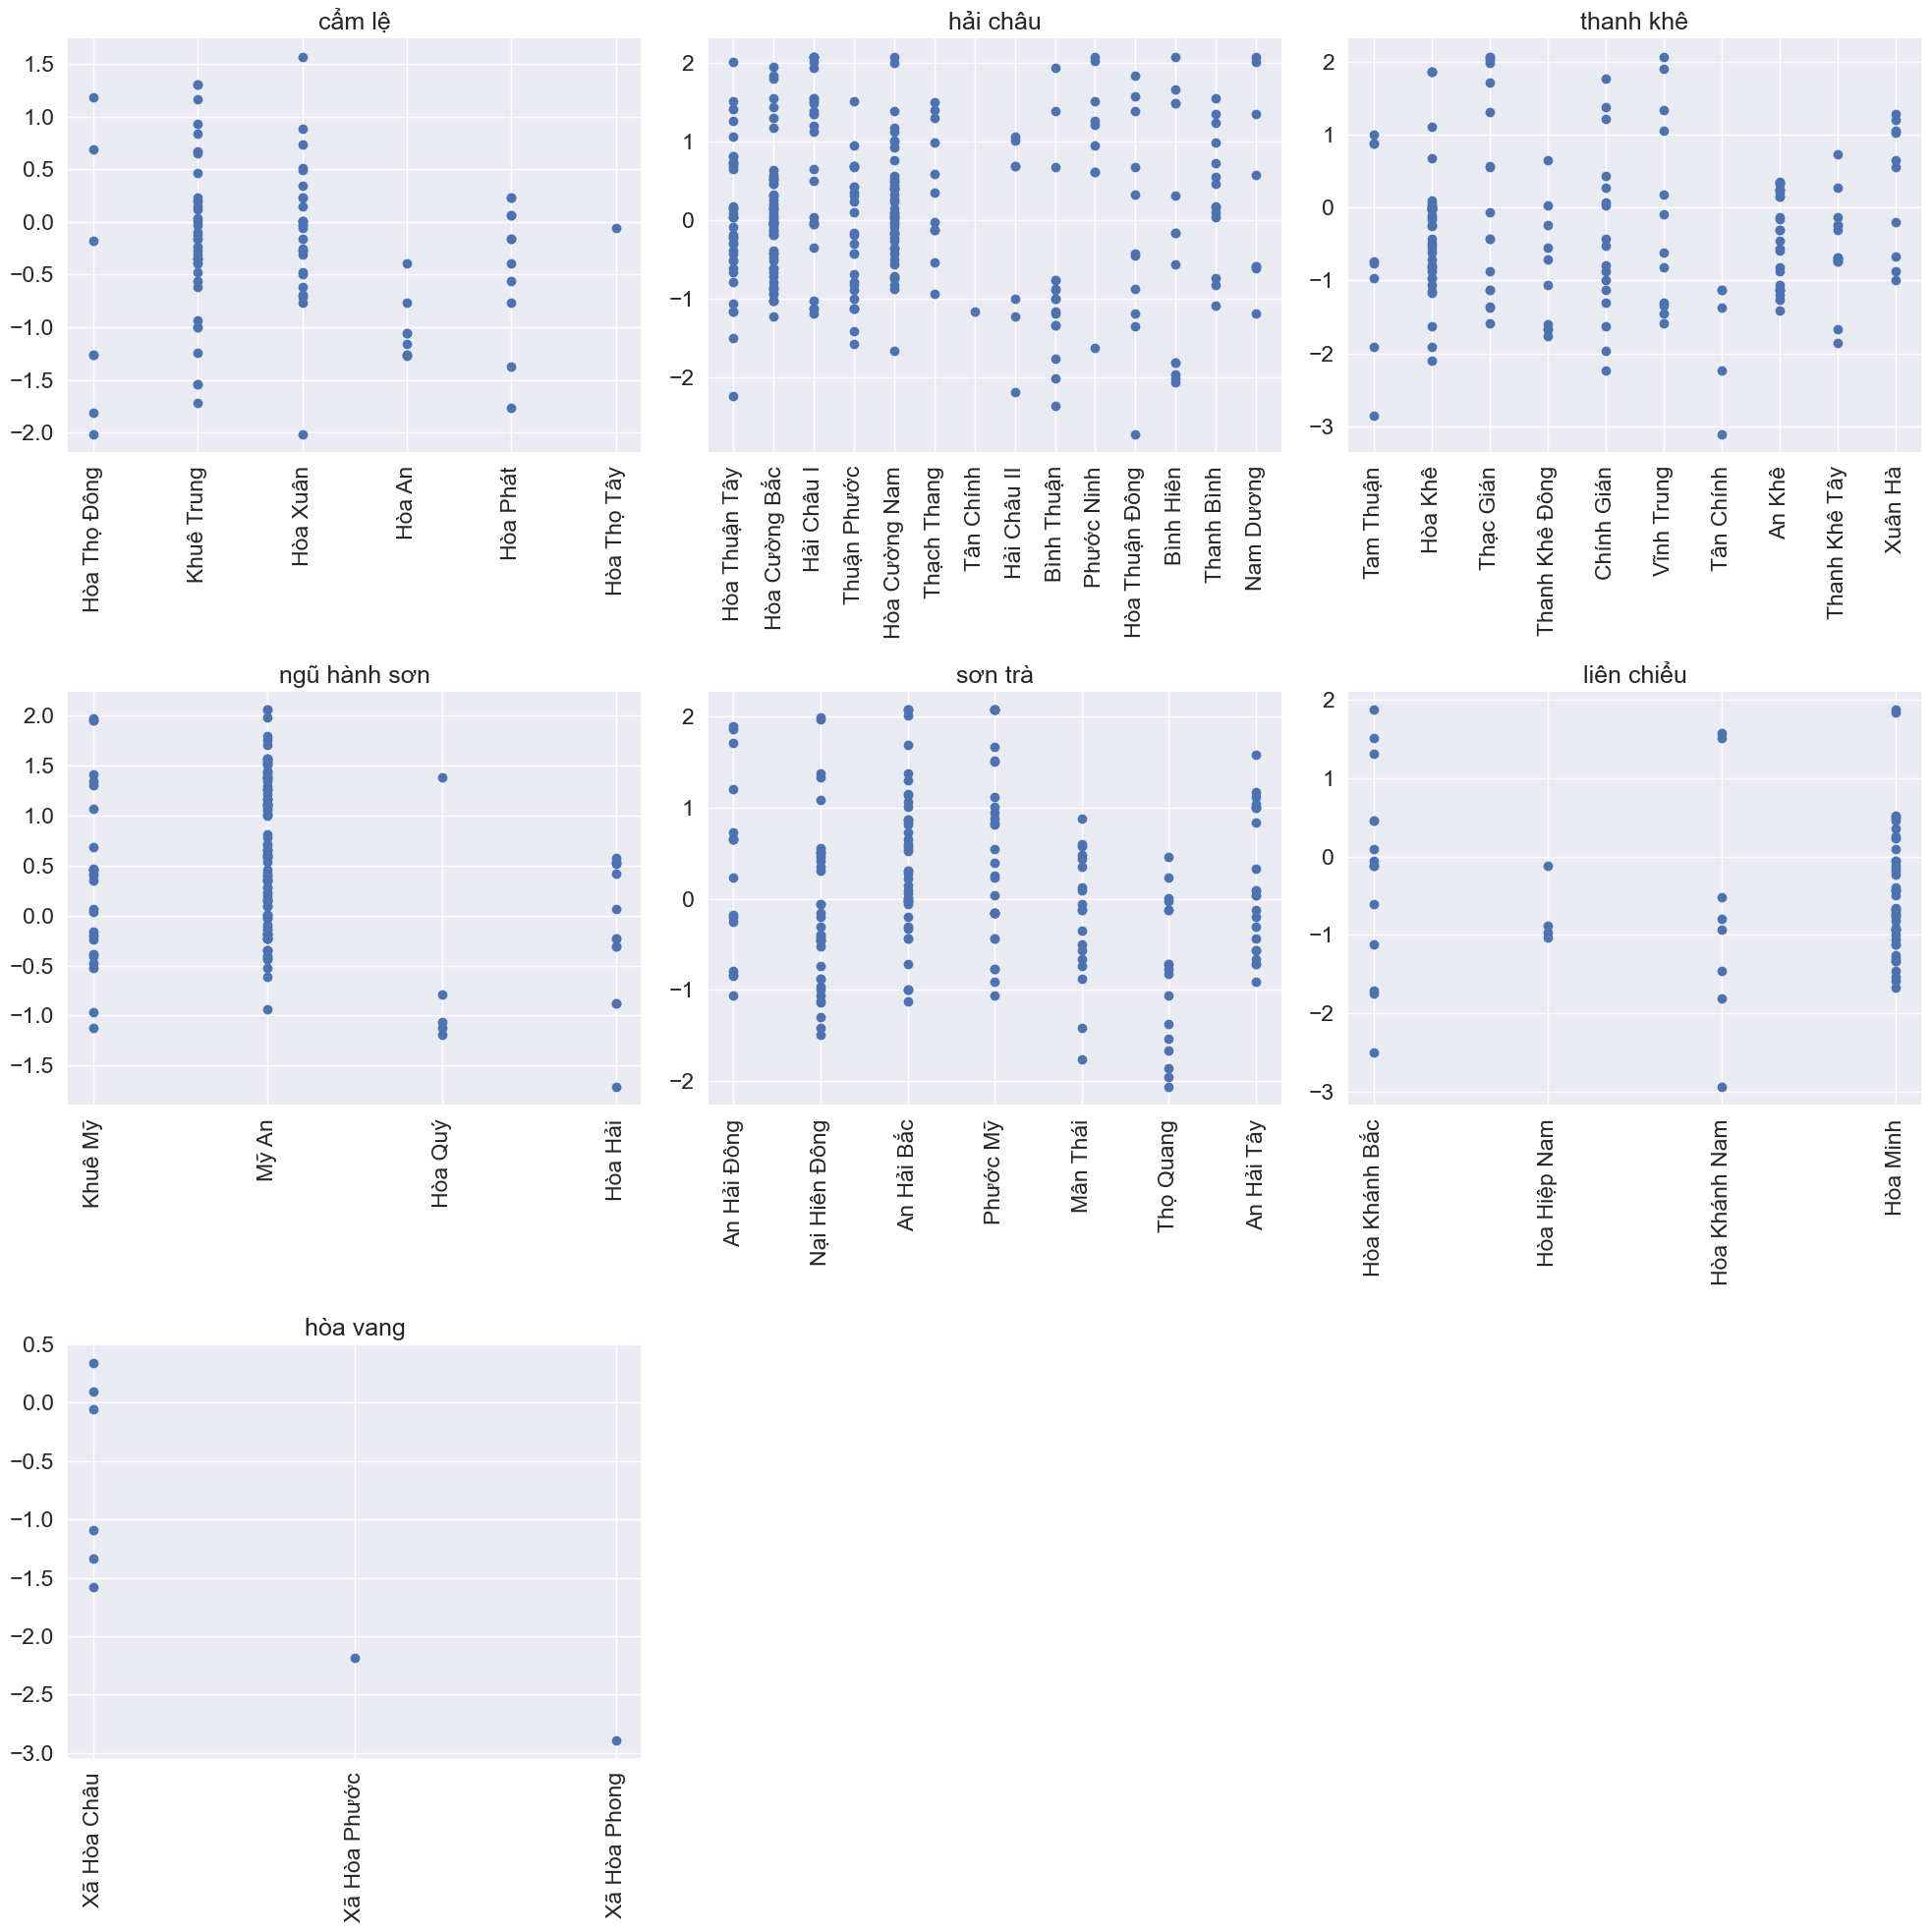

In [355]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Nhà ở các phường khác nhau thì có giá khác nhau

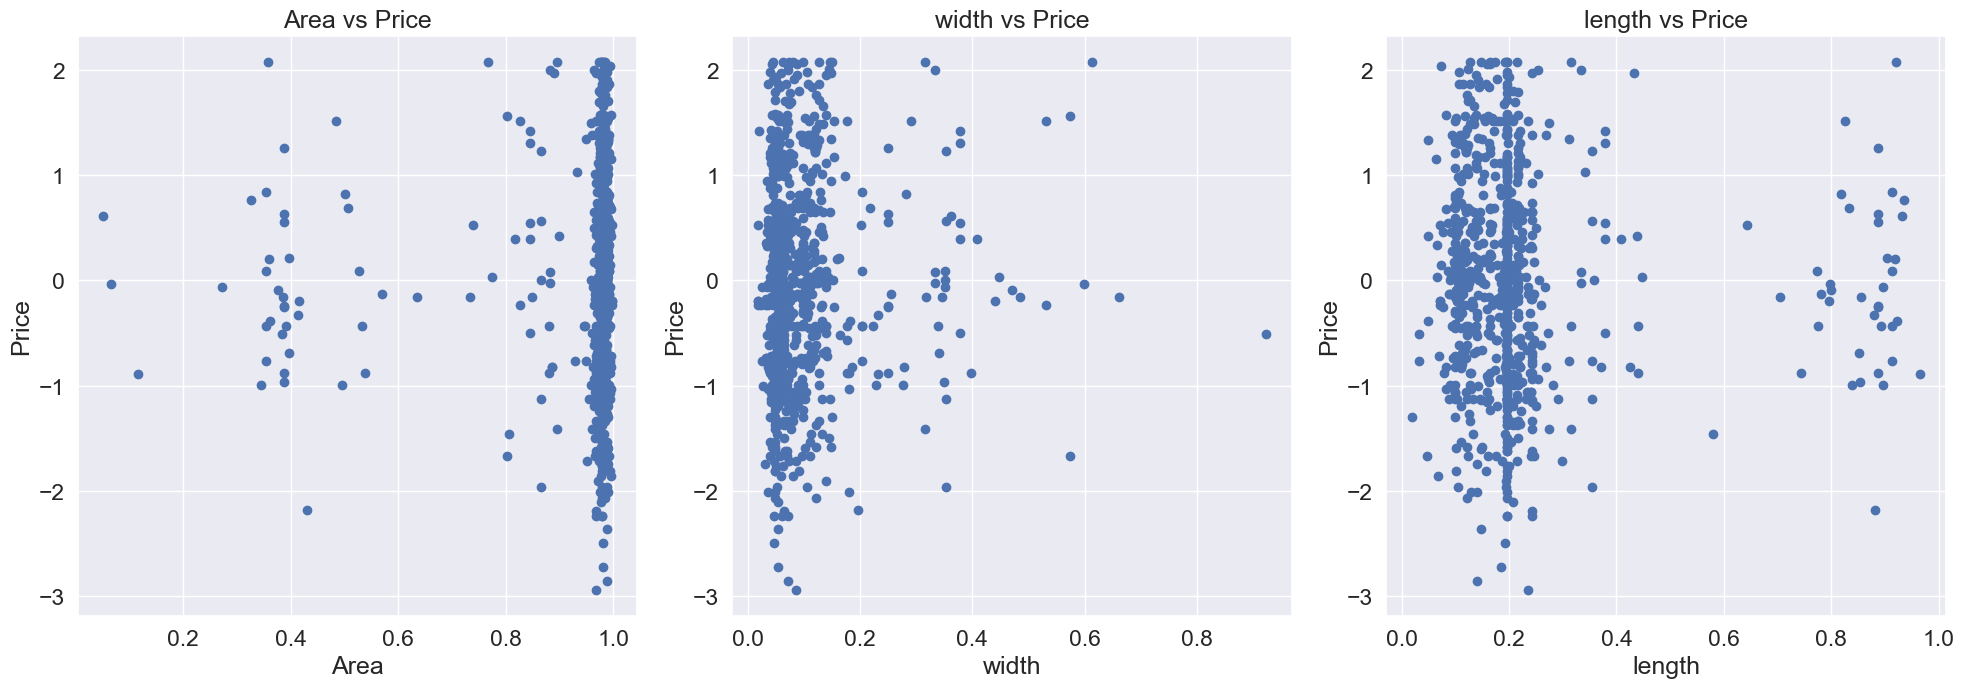

In [356]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

<Axes: >

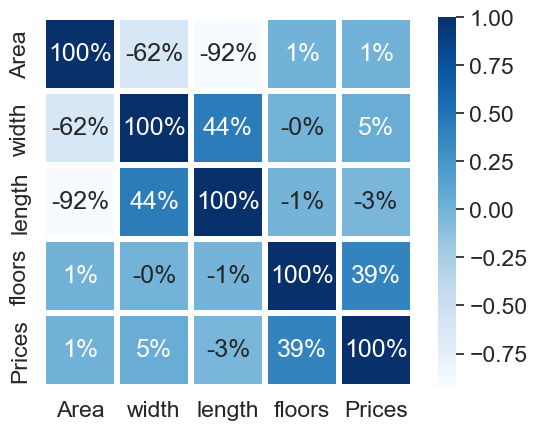

In [357]:
cols_pv = ['Area','width','length','floors','Prices']

sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")


<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors


## Lable Encoding

In [358]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [359]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [360]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [361]:
df['certificate']= le.fit_transform(df['certificate'])

In [362]:
df.head(5)

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Hà Mục,Hòa Thọ Đông,0,-0.177078,0.979404,Tây Nam,1,1,0.048970,0.195881,4
1,Thi Sách,Hòa Thuận Tây,2,-0.613236,0.988439,Không,1,1,0.107211,0.107211,1
2,Ông Ích Khiêm,Tam Thuận,6,1.009414,0.965623,Tây,1,0,0.054767,0.254111,3
3,Núi Thành,Hòa Cường Bắc,2,1.543290,0.989370,Tây,1,0,0.052718,0.135530,3
4,Trương Văn Hiến,Khuê Mỹ,4,0.352218,0.979129,Đông Nam,1,0,0.054396,0.195826,4


# Linear Regression (Trinh)

 Chia tập train/test

- Are
- length
- width
- District
- certificate
- floors

In [363]:
data_cp.isnull().sum()

Street         0
Ward           0
District       0
Prices         0
Area           0
toFace         0
type           0
certificate    0
width          0
length         0
floors         0
dtype: int64

# label encoding 

In [364]:
data_cp = data_cp[['District','Prices','Area','certificate','width','length','floors']]

In [365]:
data_cp['District'] = le.fit_transform(data_cp['District'])


In [366]:
data_cp['certificate']= le.fit_transform(data_cp['certificate'])

In [367]:
data_cp

,District,Prices,Area,certificate,width,length,floors
0,0,5.15,100.0,1,5.000000,20.000000,4
1,2,4.10,85.0,1,9.219544,9.219544,1
2,6,11.00,67.0,0,3.800000,17.631579,3
3,2,17.50,137.0,0,7.300000,18.767123,3
4,4,7.00,90.0,0,5.000000,18.000000,4
...,...,...,...,...,...,...,...
1074,0,4.90,400.0,0,5.000000,20.000000,3
1075,4,5.00,70.0,0,4.500000,15.000000,2
1076,4,11.80,65.0,0,4.500000,15.000000,5
1077,4,8.20,100.0,1,5.555556,18.000000,2


In [368]:
data_cp['certificate']==0

0       False
1       False
2        True
3        True
4        True
        ...  
1074     True
1075     True
1076     True
1077    False
1078     True
Name: certificate, Length: 944, dtype: bool

In [369]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_cp, test_size = 0.3, random_state=42, )

print(df_train.shape)
print(df_test.shape)


(660, 7)
(284, 7)


In [386]:
df_train

,District,Prices,Area,certificate,width,length,floors
573,2,13.500,85.0,0,4.1,20.5,3
429,2,4.700,80.0,0,5.0,16.0,2
554,2,6.250,65.0,0,4.3,15.0,2
424,0,2.150,94.0,0,5.0,18.8,1
139,3,3.200,60.0,0,6.0,10.0,3
...,...,...,...,...,...,...,...
111,4,4.500,40.0,0,4.0,10.0,1
400,4,7.200,95.0,0,5.0,19.0,3
994,2,4.100,90.0,0,4.5,20.0,2
566,2,4.650,75.0,0,4.5,16.6,2


In [371]:
df_test

,District,Prices,Area,certificate,width,length,floors
100,4,15.500,90.529095,0,10.000000,9.052909,3
395,5,28.500,57.000000,0,12.500000,21.000000,9
944,2,3.800,90.000000,0,5.000000,18.000000,3
24,4,14.500,185.000000,0,10.000000,18.500000,4
31,3,3.350,60.000000,0,6.000000,10.000000,2
...,...,...,...,...,...,...,...
820,4,5.700,99.000000,0,9.949874,9.949874,2
342,5,3.600,75.000000,0,5.000000,17.000000,2
82,4,15.799,106.000000,0,5.000000,21.200000,4
155,2,4.500,76.000000,0,4.000000,19.000000,1


<Axes: >

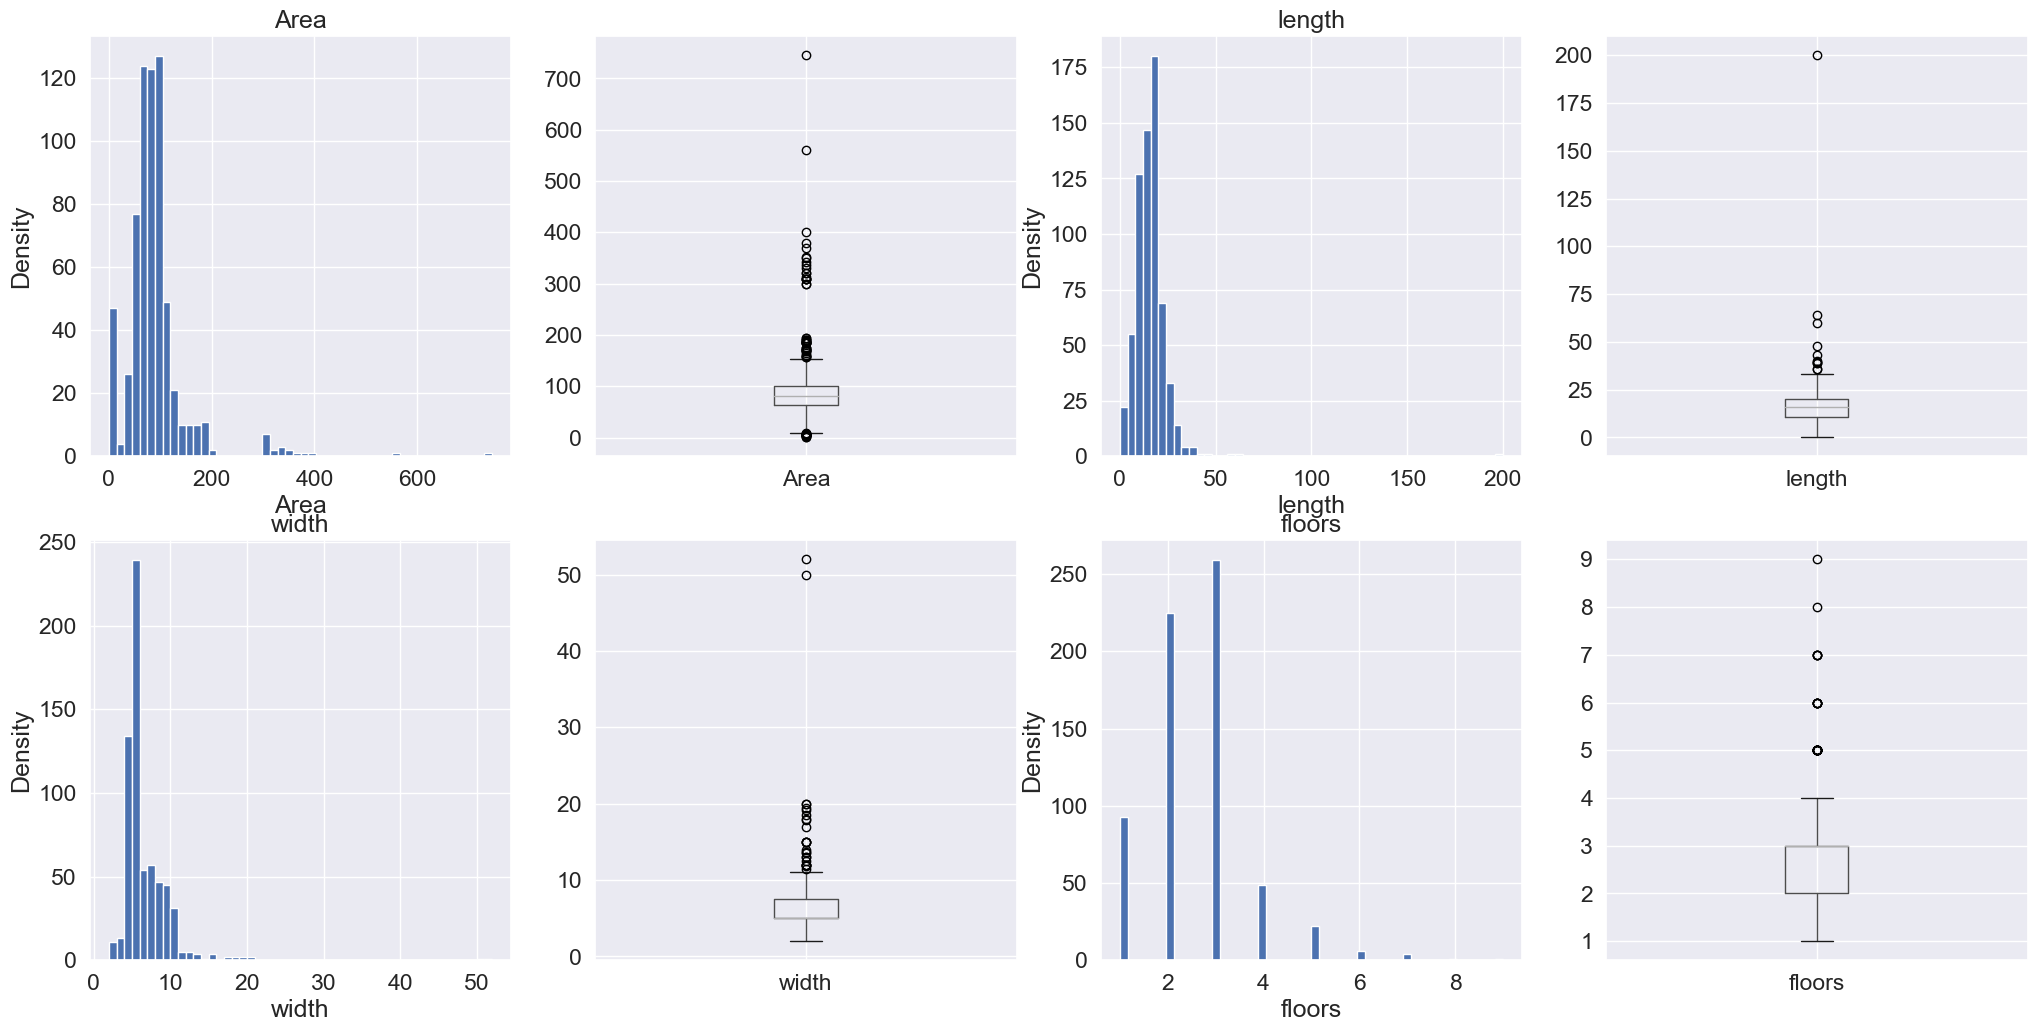

In [372]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.Area.hist(bins=50)
figure.set_title('Area')
figure.set_xlabel('Area')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="Area")

plt.subplot(2,4,3)
figure=df_train.length.hist(bins=50)
figure.set_title('length')
figure.set_xlabel('length')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="length")

plt.subplot(2,4,5)
figure=df_train.width.hist(bins=50)
figure.set_title('width')
figure.set_xlabel('width')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="width")

plt.subplot(2,4,7)
figure=df_train.floors.hist(bins=50)
figure.set_title('floors')
figure.set_xlabel('floors')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="floors")



Kết luận : áp dụng ngoại lệ cho các biến Area, width, length, floors

In [373]:
# Áp dụng ngoại lệ lên tập train
uppper_boundary=df_train['Area'].mean() + 3* df_train['Area'].std()
print("Biên trên:",uppper_boundary)

df_train.loc[(df_train.Area>uppper_boundary),'Area'] = uppper_boundary

Biên trên: 276.67987298800466


In [374]:
uppper_boundary=df_train['width'].mean() + 3* df_train['width'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 17.109477068878483


In [375]:
uppper_boundary=df_train['length'].mean() + 3* df_train['length'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 46.643242886517754


In [376]:
uppper_boundary=df_train['floors'].mean() + 3* df_train['floors'].std()
print("Biên trên:",uppper_boundary)

df_train.loc[(df_train.floors>uppper_boundary),'floors']=int(uppper_boundary)

Biên trên: 5.8919196008747665


# Trực quan sau khi xử lý ngoại lệ cho tập train

<Axes: >

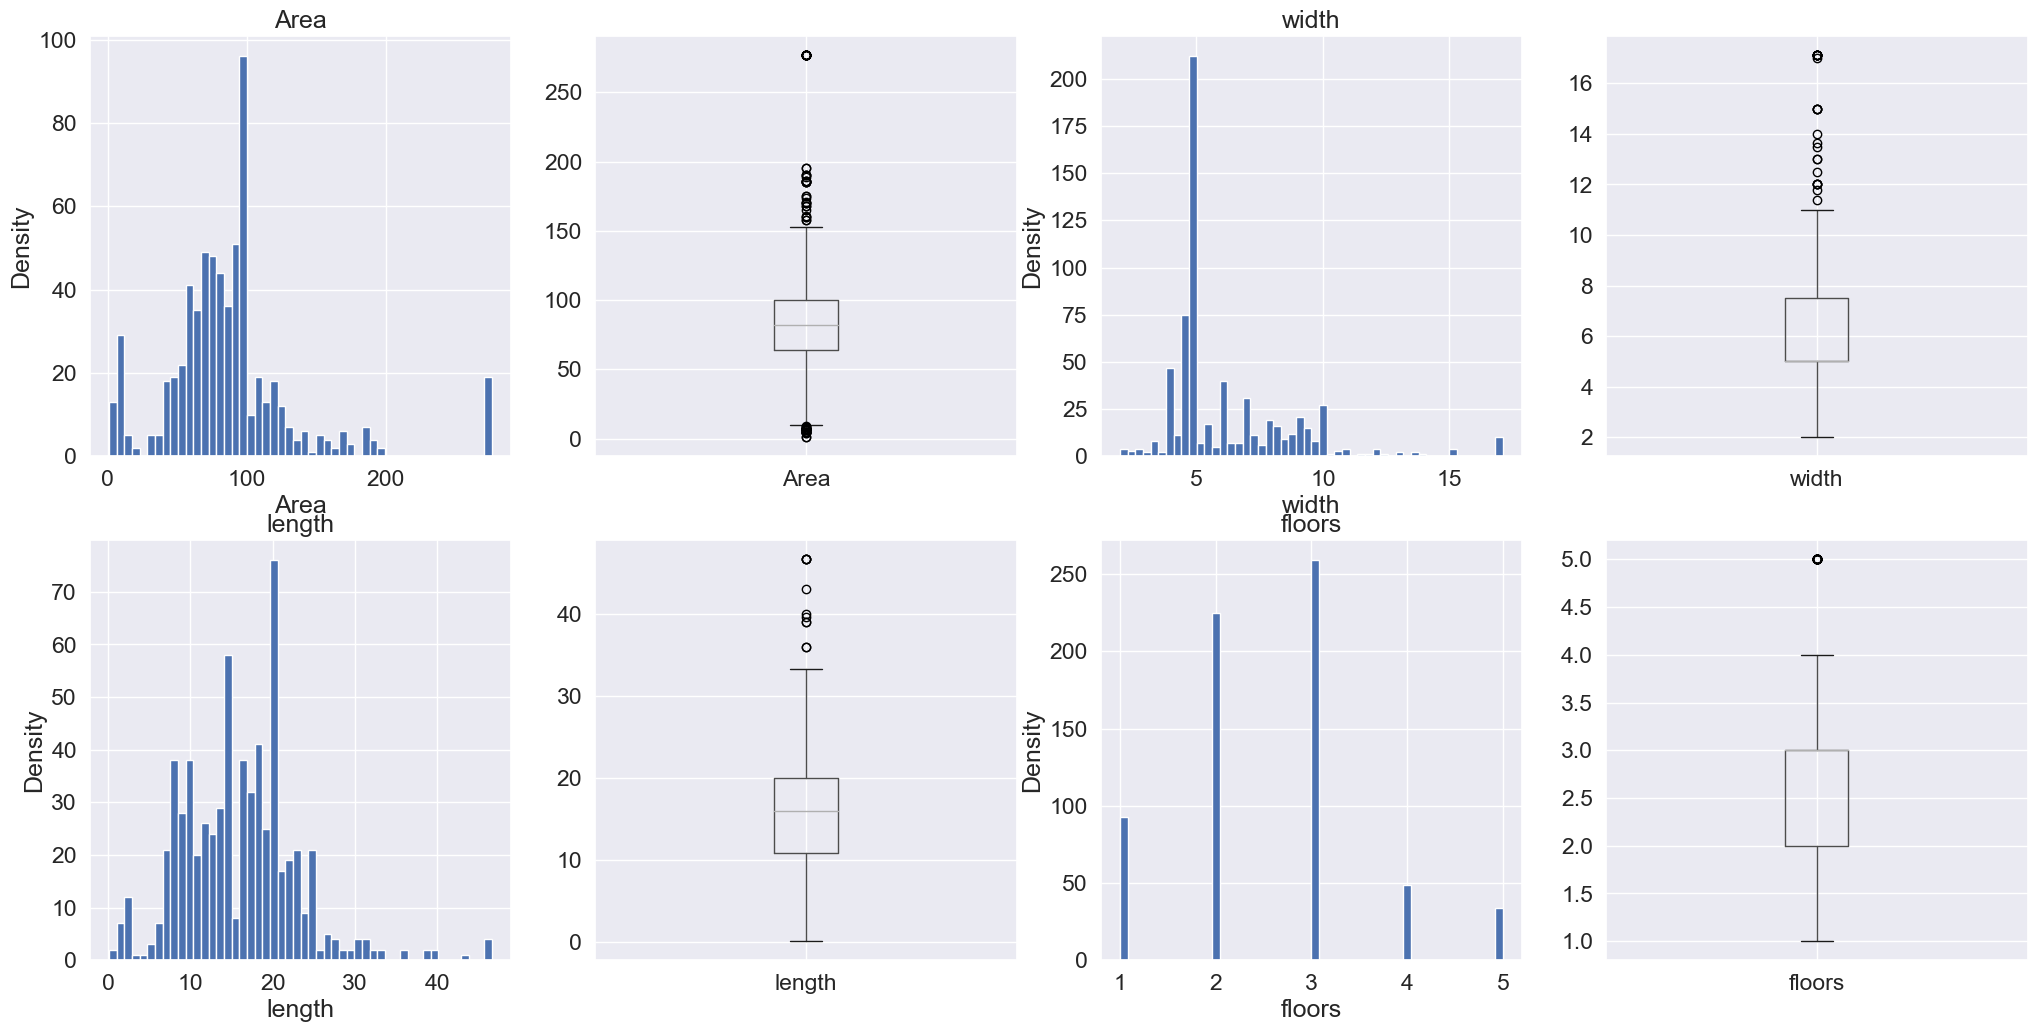

In [377]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure = df_train.Area.hist(bins=50)
figure.set_title('Area')
figure.set_xlabel('Area')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="Area")

plt.subplot(2,4,3)
figure = df_train.width.hist(bins=50)
figure.set_title('width')
figure.set_xlabel('width')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="width")

plt.subplot(2,4,5)
figure = df_train.length.hist(bins=50)
figure.set_title('length')
figure.set_xlabel('length')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="length")

plt.subplot(2,4,7)
figure = df_train.floors.hist(bins=50)
figure.set_title('floors')
figure.set_xlabel('floors')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="floors")

In [378]:
# Có xử lý ngoại lệ
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (660, 7)
X_test: (284, 7)


In [379]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')

# Chuẩn hóa dữ liệu tập train

In [380]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [381]:
X_train_norm.head()

,District,Area,certificate,width,length,floors
0,0.022829,0.970237,0.0,0.046800,0.233998,0.034244
1,0.024454,0.978159,0.0,0.061135,0.195632,0.024454
2,0.029892,0.971504,0.0,0.064269,0.224193,0.029892
3,0.000000,0.979196,0.0,0.052085,0.195839,0.010417
4,0.048964,0.979274,0.0,0.097927,0.163212,0.048964


In [387]:
X_test_norm.head()

,District,Area,certificate,width,length,floors
0,0.043637,0.987608,0.0,0.109093,0.098761,0.032728
1,0.079533,0.906677,0.0,0.198833,0.334039,0.143160
2,0.021742,0.978376,0.0,0.054354,0.195675,0.032613
3,0.021473,0.993143,0.0,0.053683,0.099314,0.021473
4,0.048996,0.979927,0.0,0.097993,0.163321,0.032664


## Xây dựng model linear regression

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train_norm, y_train)


LinearRegression()

In [389]:
# Dự đoán
predictions_LR  = model_LR.predict(X_test_norm)

In [390]:
from sklearn.metrics import r2_score 
r2_score_LR = r2_score(y_test,predictions_LR)
print(r2_score_LR)

0.06741187552807015


In [391]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

     Price_Test  Price_Predict
100   15.500000       8.195766
395   28.500000       7.107711
944    3.800000       7.697079
24    14.500000       8.195158
31     3.350000       7.633859
410    5.600000       8.170033
701    7.300000       8.037967
389    5.300000       7.884978
461    4.550000       7.614453
453    8.092342      17.741117


In [392]:
print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions_LR)**0.5))

Mean Y_test: 8.582415586804409
rmse: 9.636842086260366


# Tìm siêu tham số cho model

# Random Forest Regressor (QKhang)

# Decision Tree Regression (Đức)

# Đánh giá 3 thuật theo các metrics (Đức)